In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cmath 
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200  # 200 e.g. is really fine, but slower


In [3]:
def ugh():
    # set the x-spine
    ax = plt.gca()
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()


    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.grid()

Text(0, 0.5, 'Amplitude')

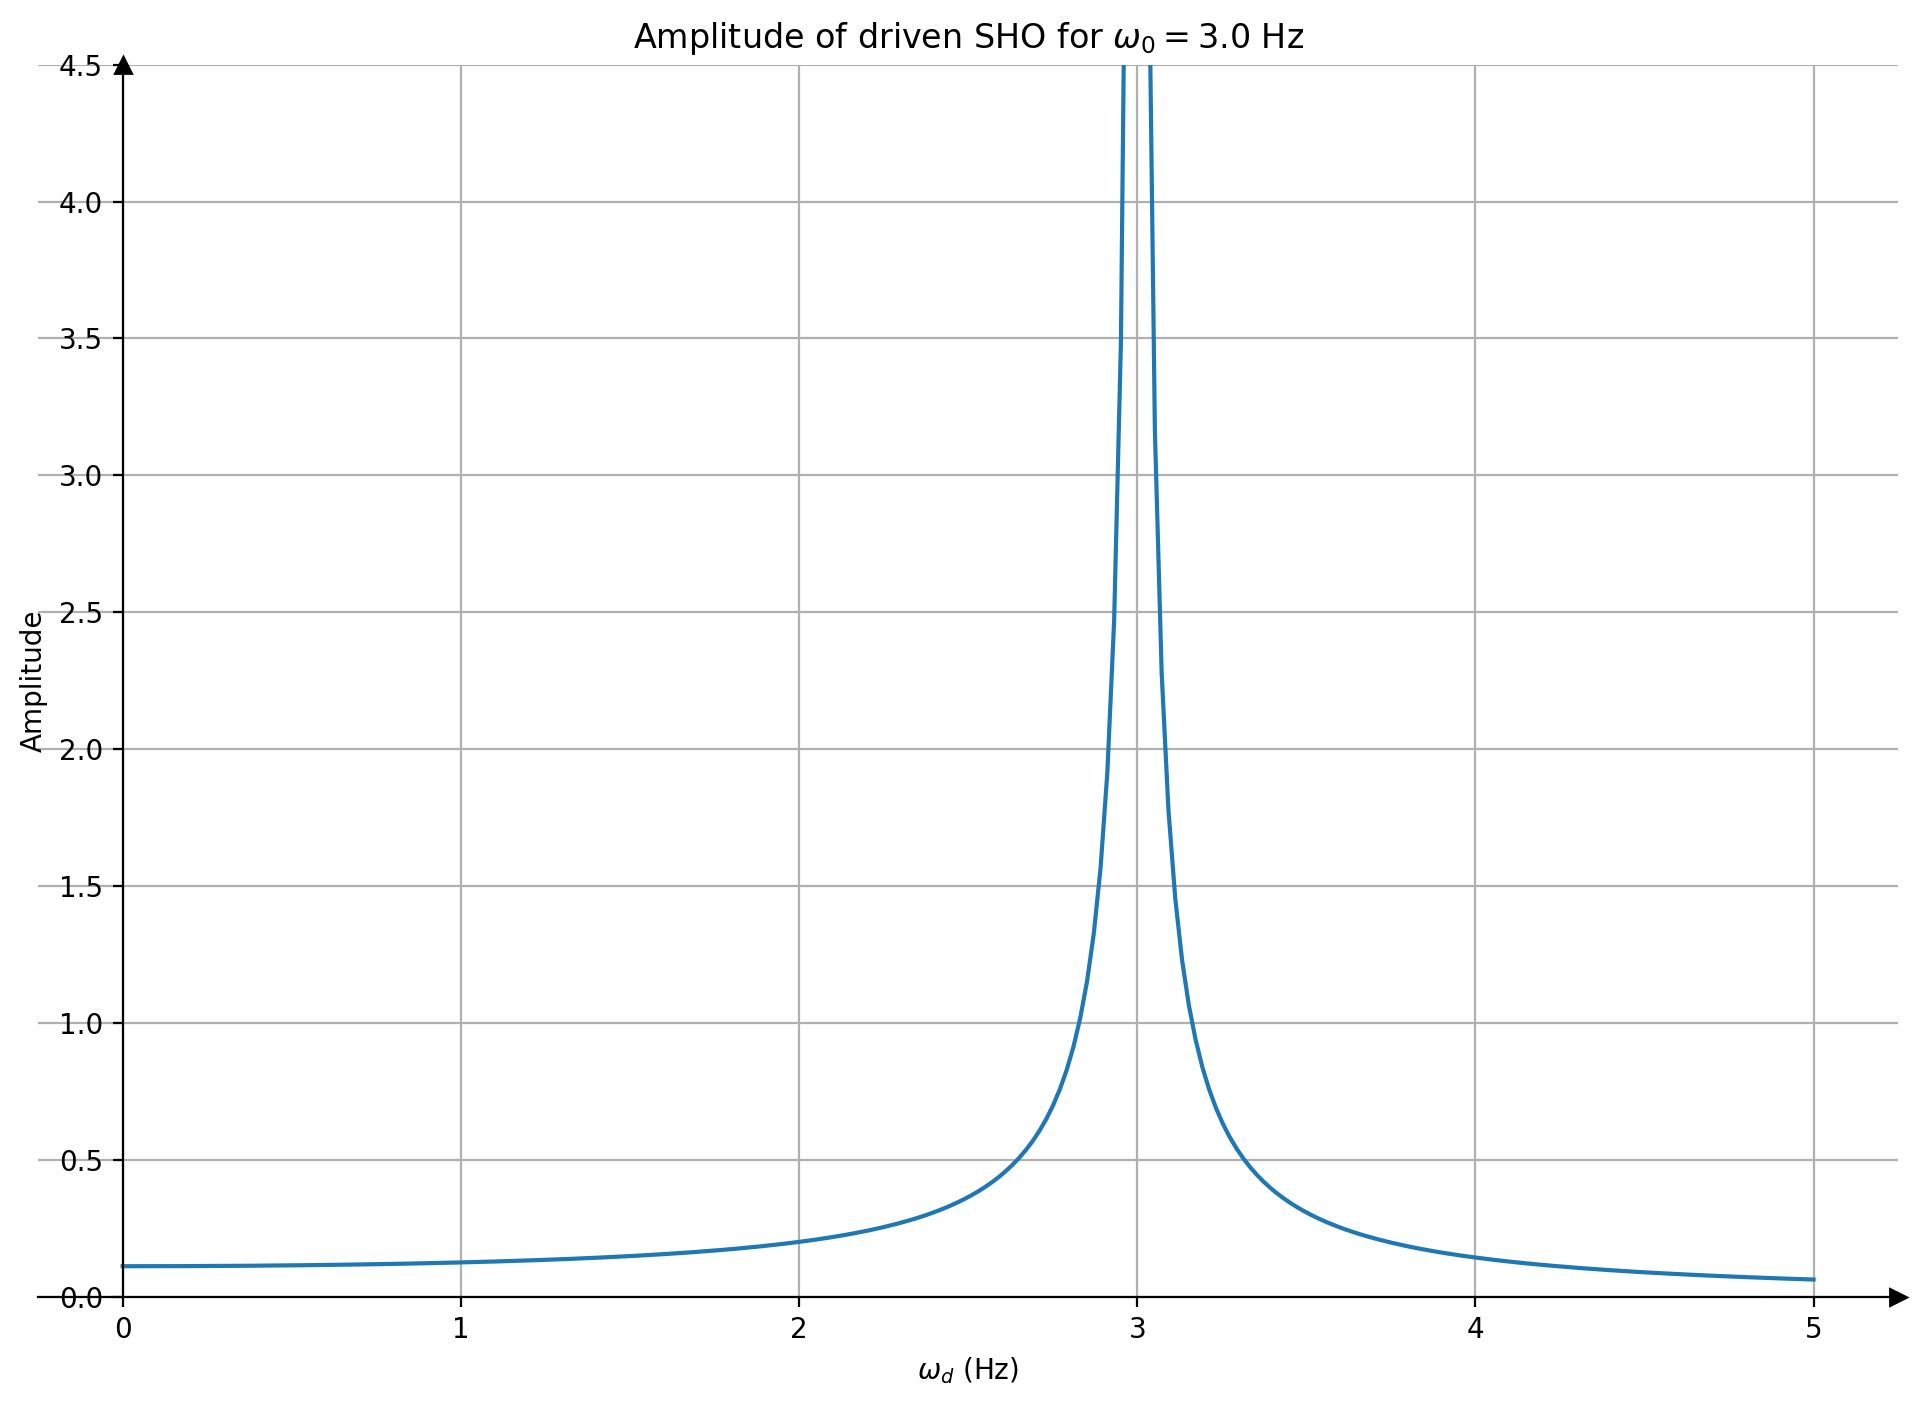

In [4]:
# amplitude for driven, undamped SHO
F0=1
m = 1
omega0 = 3
omegad=np.linspace(0,5,250)
Cvals = np.abs(F0/m/(omega0**2-omegad**2))
plt.plot(omegad,Cvals)
ugh()
plt.ylim(0,4.5)
plt.title("Amplitude of driven SHO for $\omega_0=%4.1f$ Hz" % omega0)
plt.xlabel("$\omega_d$ (Hz)")
plt.ylabel("Amplitude")

In [5]:
def gamma(omega: float, gamma0 : float, plus: bool) -> complex:
    """
    return the effective gamma 
    """
    val = cmath.sqrt(gamma0**2/4 -omega**2)
    if plus:
        return gamma0/2 + val
    else:
        return gamma0/2 - val


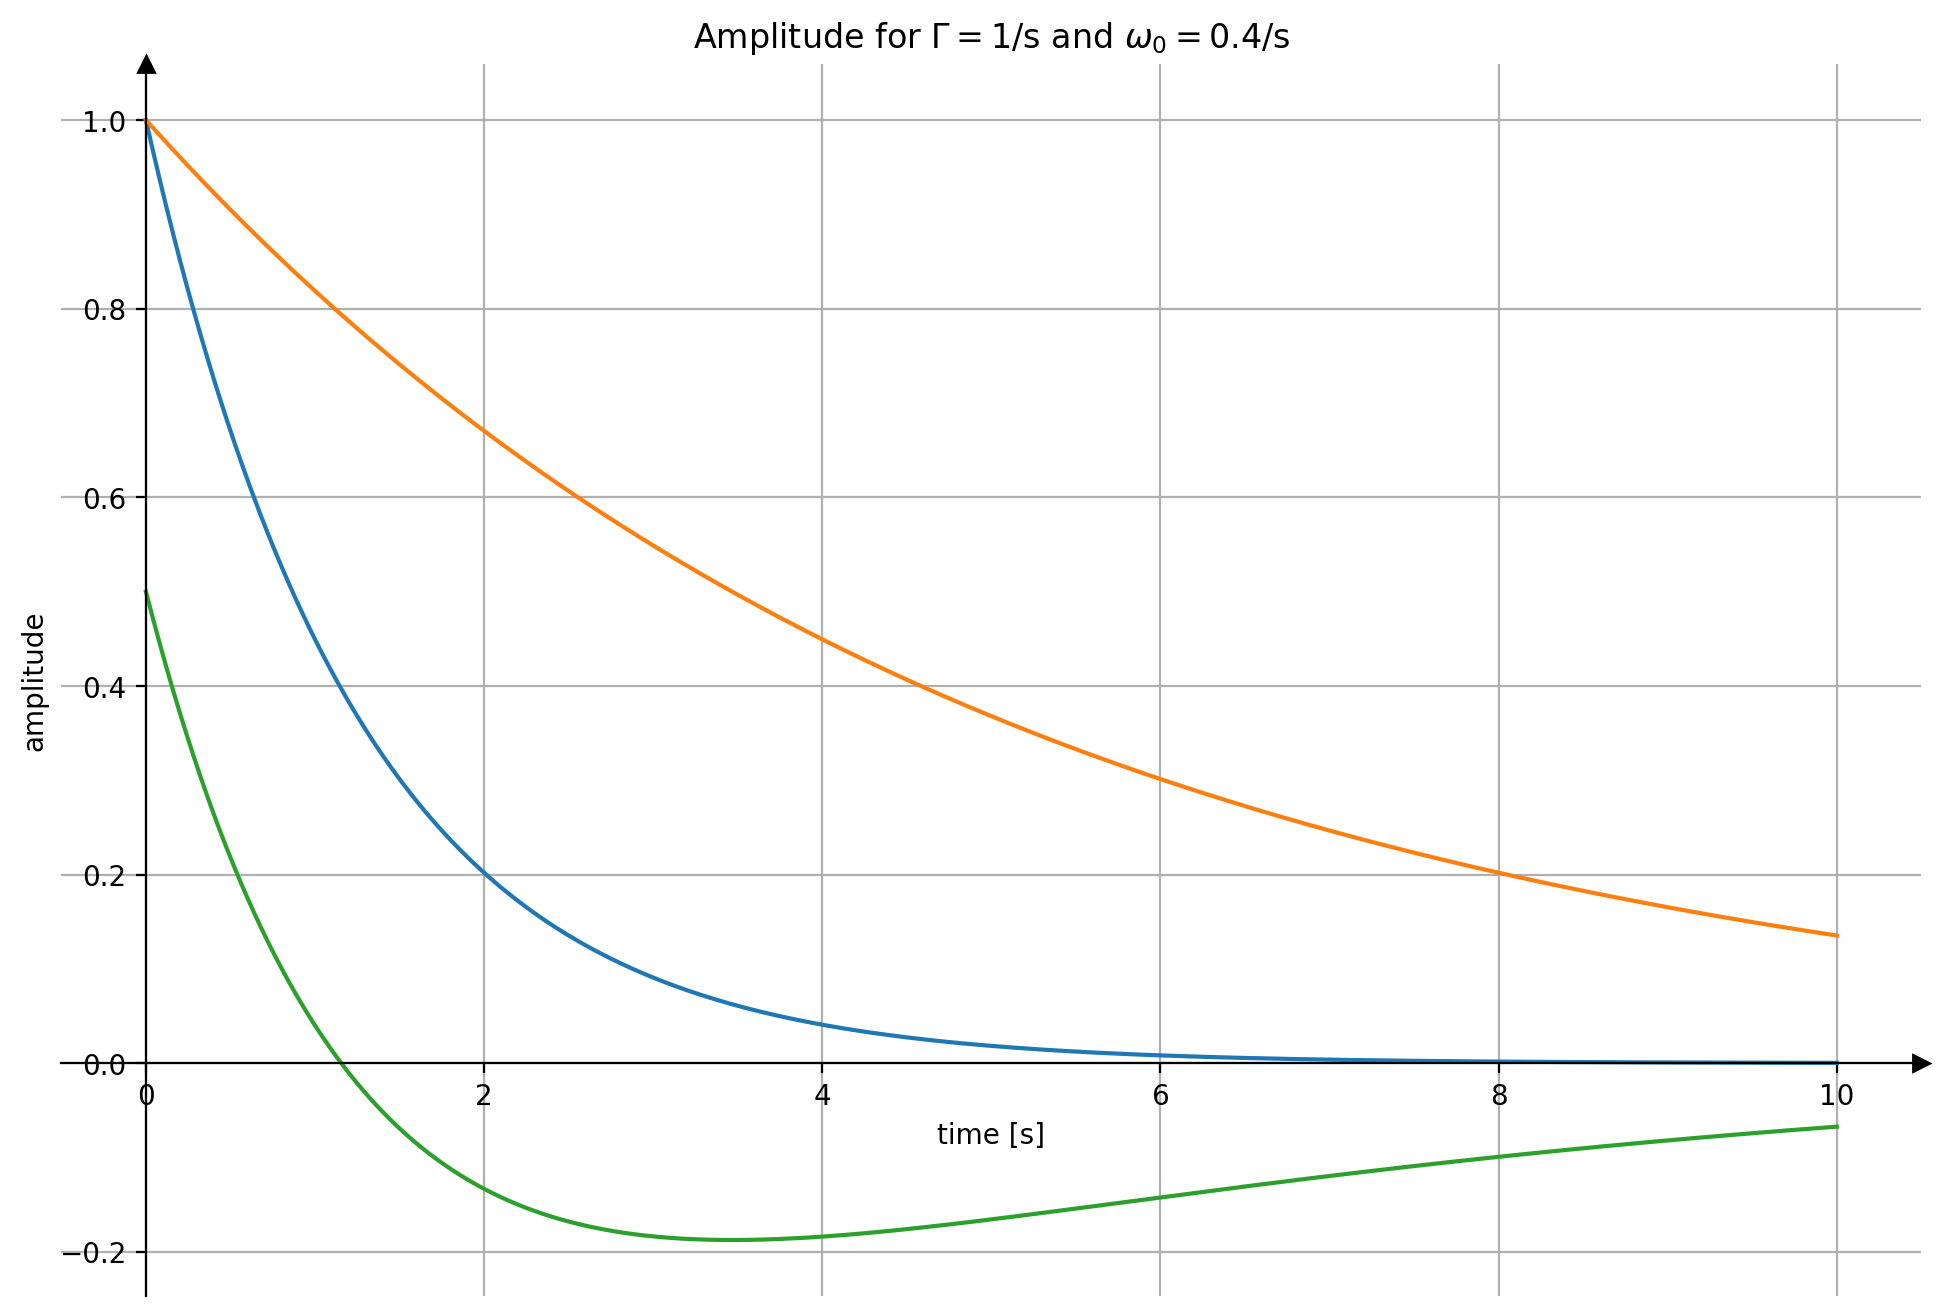

In [6]:
# overdamped
omega = 0.4
gammao = 1.0
gp = gamma(omega, gammao, True)
gm = gamma(omega, gammao, False)
xvals = np.linspace(0, 10, 250)
yvalsp = [np.exp(-gp*x) for x in xvals]
yvalsm = [np.exp(-gm*x) for x in xvals]
yvalscomb = [np.exp(-gp*x) -0.5* np.exp(-gm*x) for x in xvals]
#plt.plot(xvals, yvalsp)
# plot real art of yvalsp
plt.plot(xvals, np.real(yvalsp))
plt.plot(xvals, np.real(yvalsm))
plt.plot(xvals, np.real(yvalscomb))
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Amplitude for $\Gamma=%d$/s and $\omega_0=%3.1f$/s" %(gammao, omega))
ugh()

(0.5+4.9749371855331j)


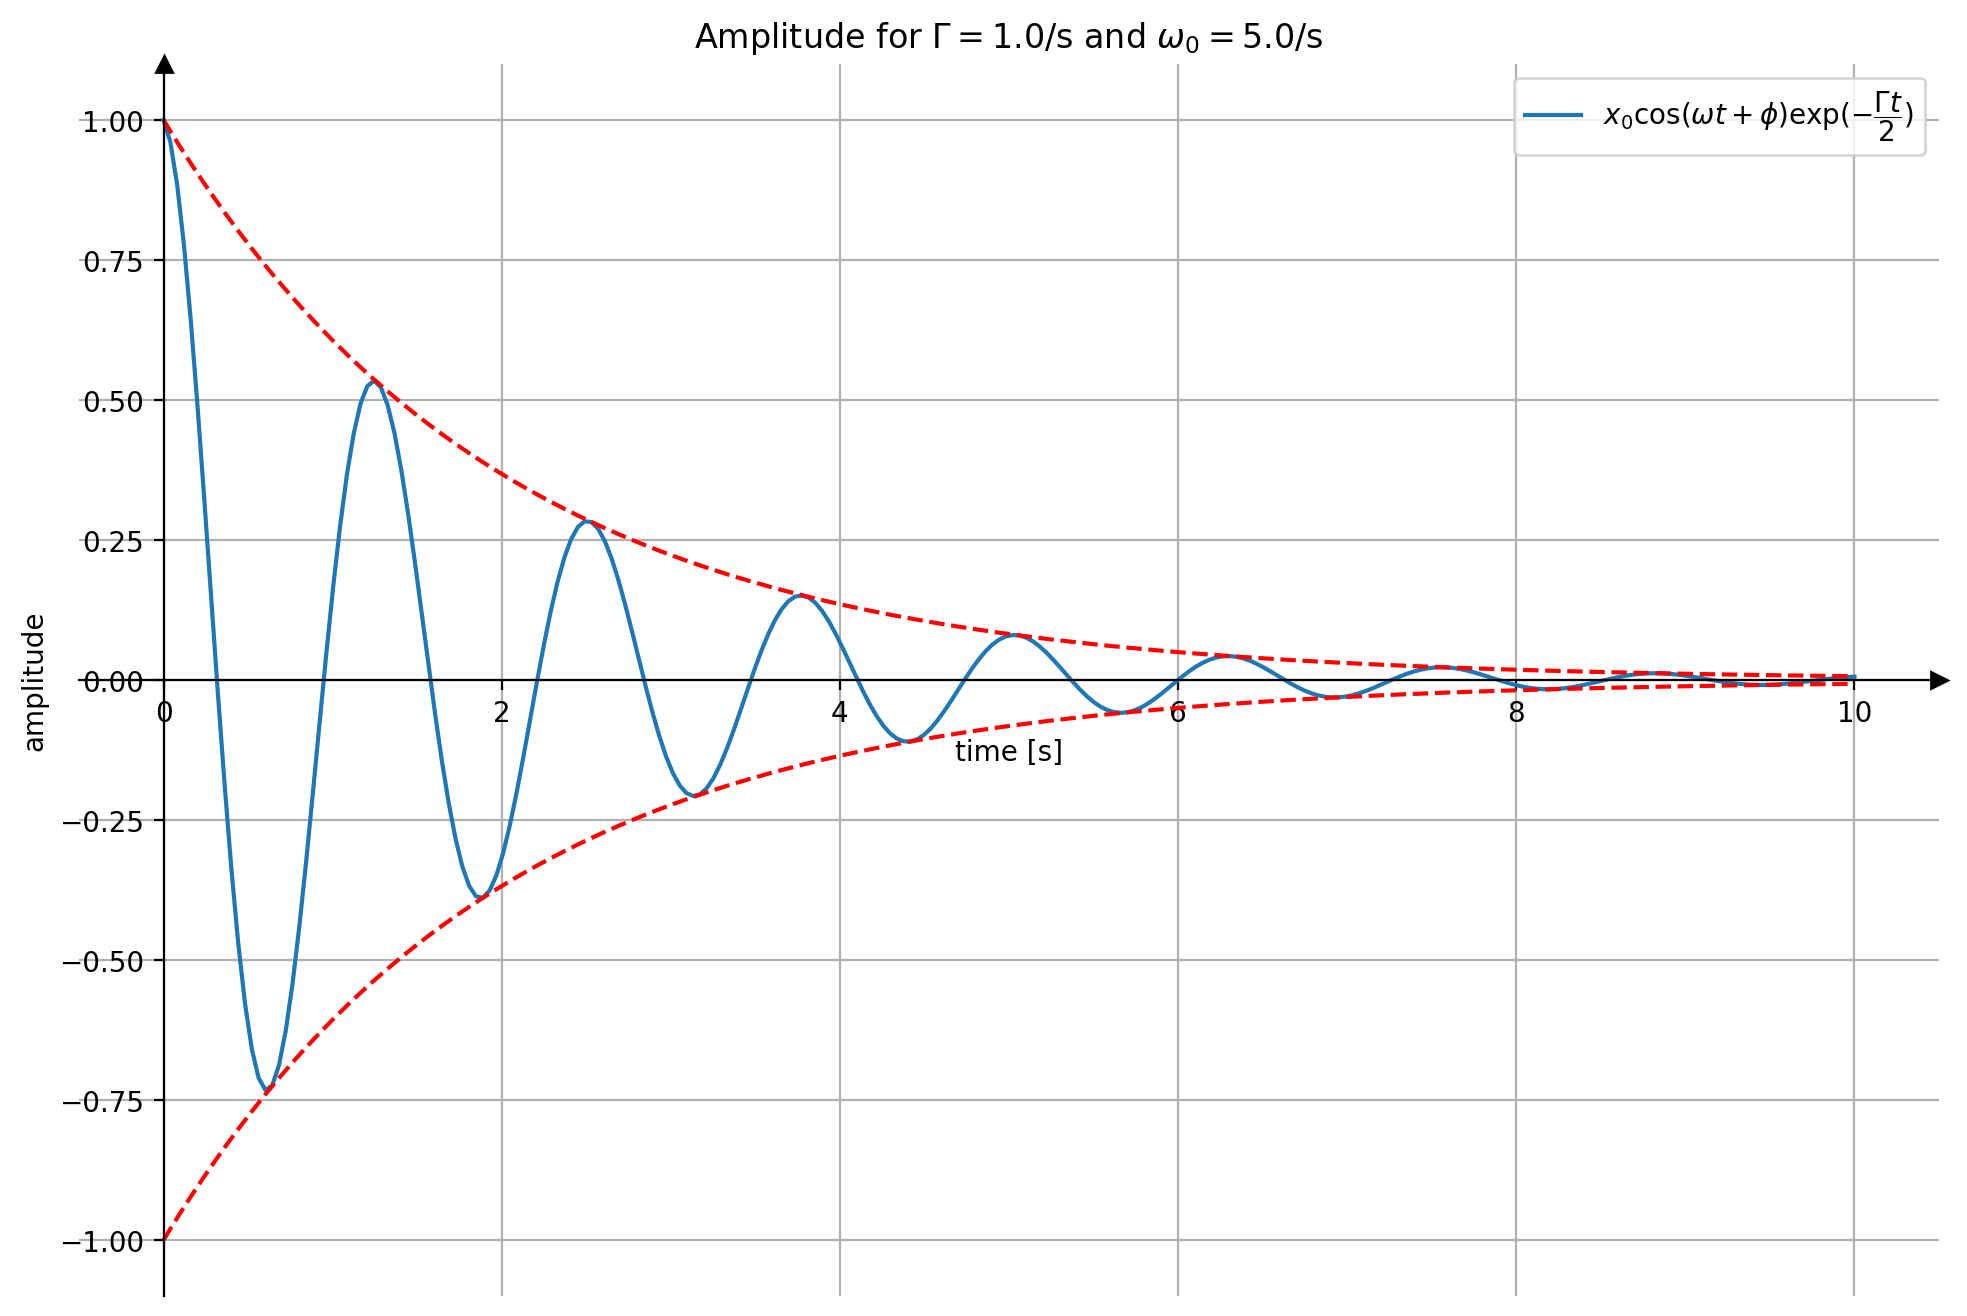

In [7]:
gamma0=1
omega0=5
gcp = gamma(omega0, gamma0, True)
#gcm = gamma(gamma0, omega0, False)
print(gcp)
yvalscp = [np.exp(-gcp*x) for x in xvals]
#yvalscm = [np.exp(-gcm*x) for x in xvals]
envelopep = [np.exp(-(gcp.real)*x) for x in xvals]
envelopen = [-np.exp(-(gcp.real)*x) for x in xvals]
plt.plot(xvals, np.real(yvalscp),
         label="$x_0\cos(\omega t + \phi)\exp(-\dfrac{\Gamma t}{2})$")
#plt.plot(xvals, np.real(yvalscp),
#         label="$\cos(\omega t + \phi)$")
plt.plot(xvals, envelopep, 'r--')
plt.plot(xvals, envelopen, 'r--')
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Amplitude for $\Gamma=%3.1f$/s and $\omega_0=%3.1f$/s" %(gamma0,omega0))
plt.legend()
ugh()


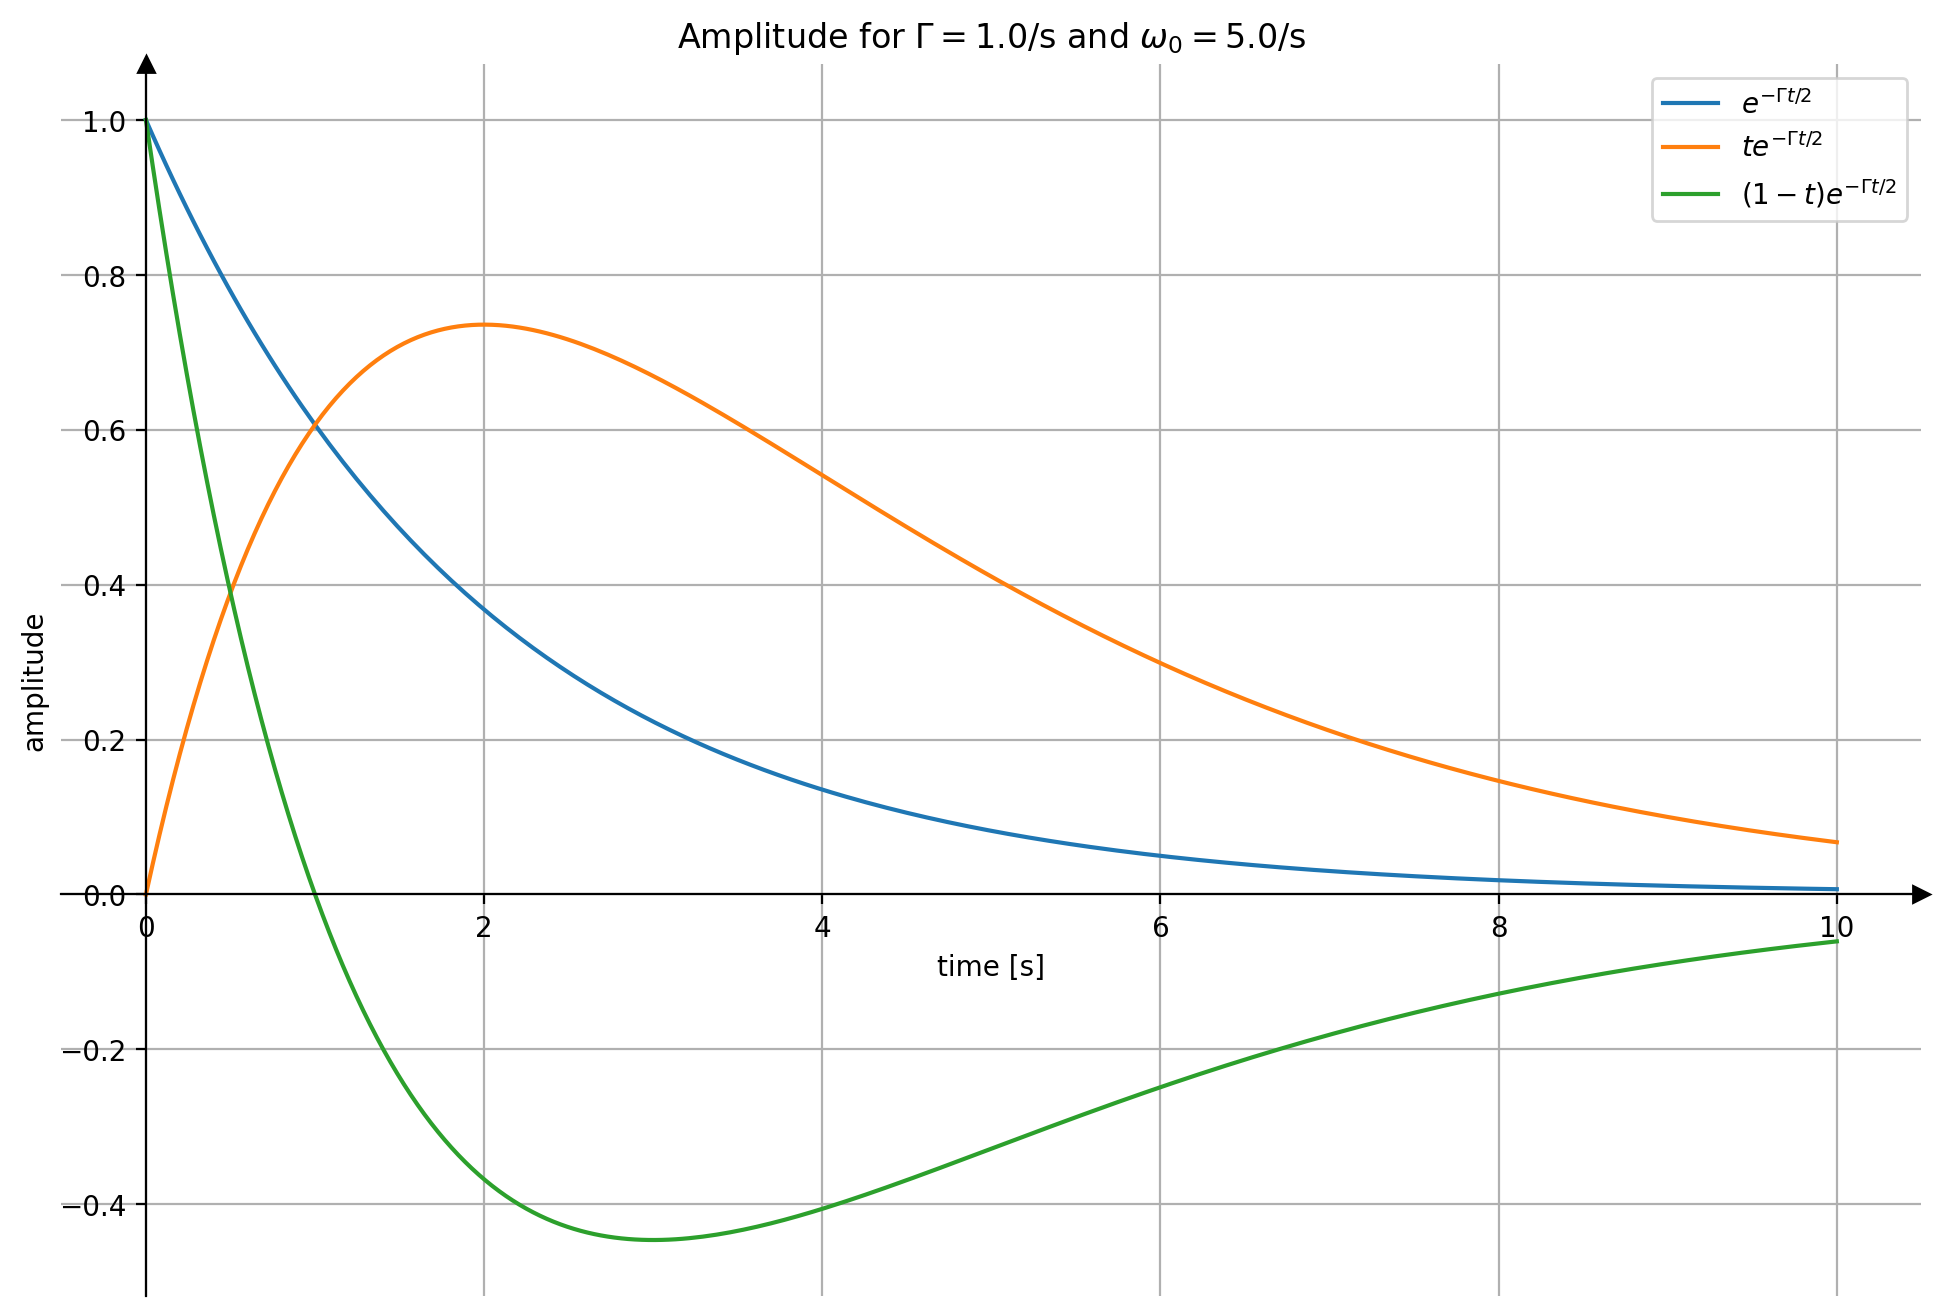

In [8]:
# critical damping
gamma0=1
yvals1 = np.array([np.exp(-gamma0/2.*x) for x in xvals])
yvals2 = np.array([np.exp(-gamma0/2.*x)*x for x in xvals])
yvals3 = np.add(yvals1,yvals2*(-1))
plt.plot(xvals, yvals1, label="$e^{-\Gamma t /2}$")
plt.plot(xvals, yvals2, label="$t e^{-\Gamma t /2} $")
plt.plot(xvals, yvals3, label="$(1-t)e^{-\Gamma t /2} $")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Amplitude for $\Gamma=%3.1f$/s and $\omega_0=%3.1f$/s" %(gamma0,omega0))
plt.legend()
ugh()

In [9]:
def damped_sho(omega:float, gamma: float, t: np.array, c1: float, c2:float) -> np.array:
    """
    return the amplitue vs time for a damped SHO
    """
    print(gamma, omega, c1, c2)
    return np.exp(-gamma*t/2)*(c1*np.exp(omega*t) + c2*np.exp(omega*t))

def omega_eff(gamma: float, omega0: float) -> complex:
    """
    return the oscillation frequency
    """
    return cmath.sqrt(gamma*gamma - omega0*omega0/4)

o1 is  (11.984990613262907+0j)
12.0 (11.984990613262907+0j) 0.041718847860146575 -0.004171884786014658
o3 is  0.5999987999988
0.0012 0.5999987999988 0.833335000005 -0.833335000005


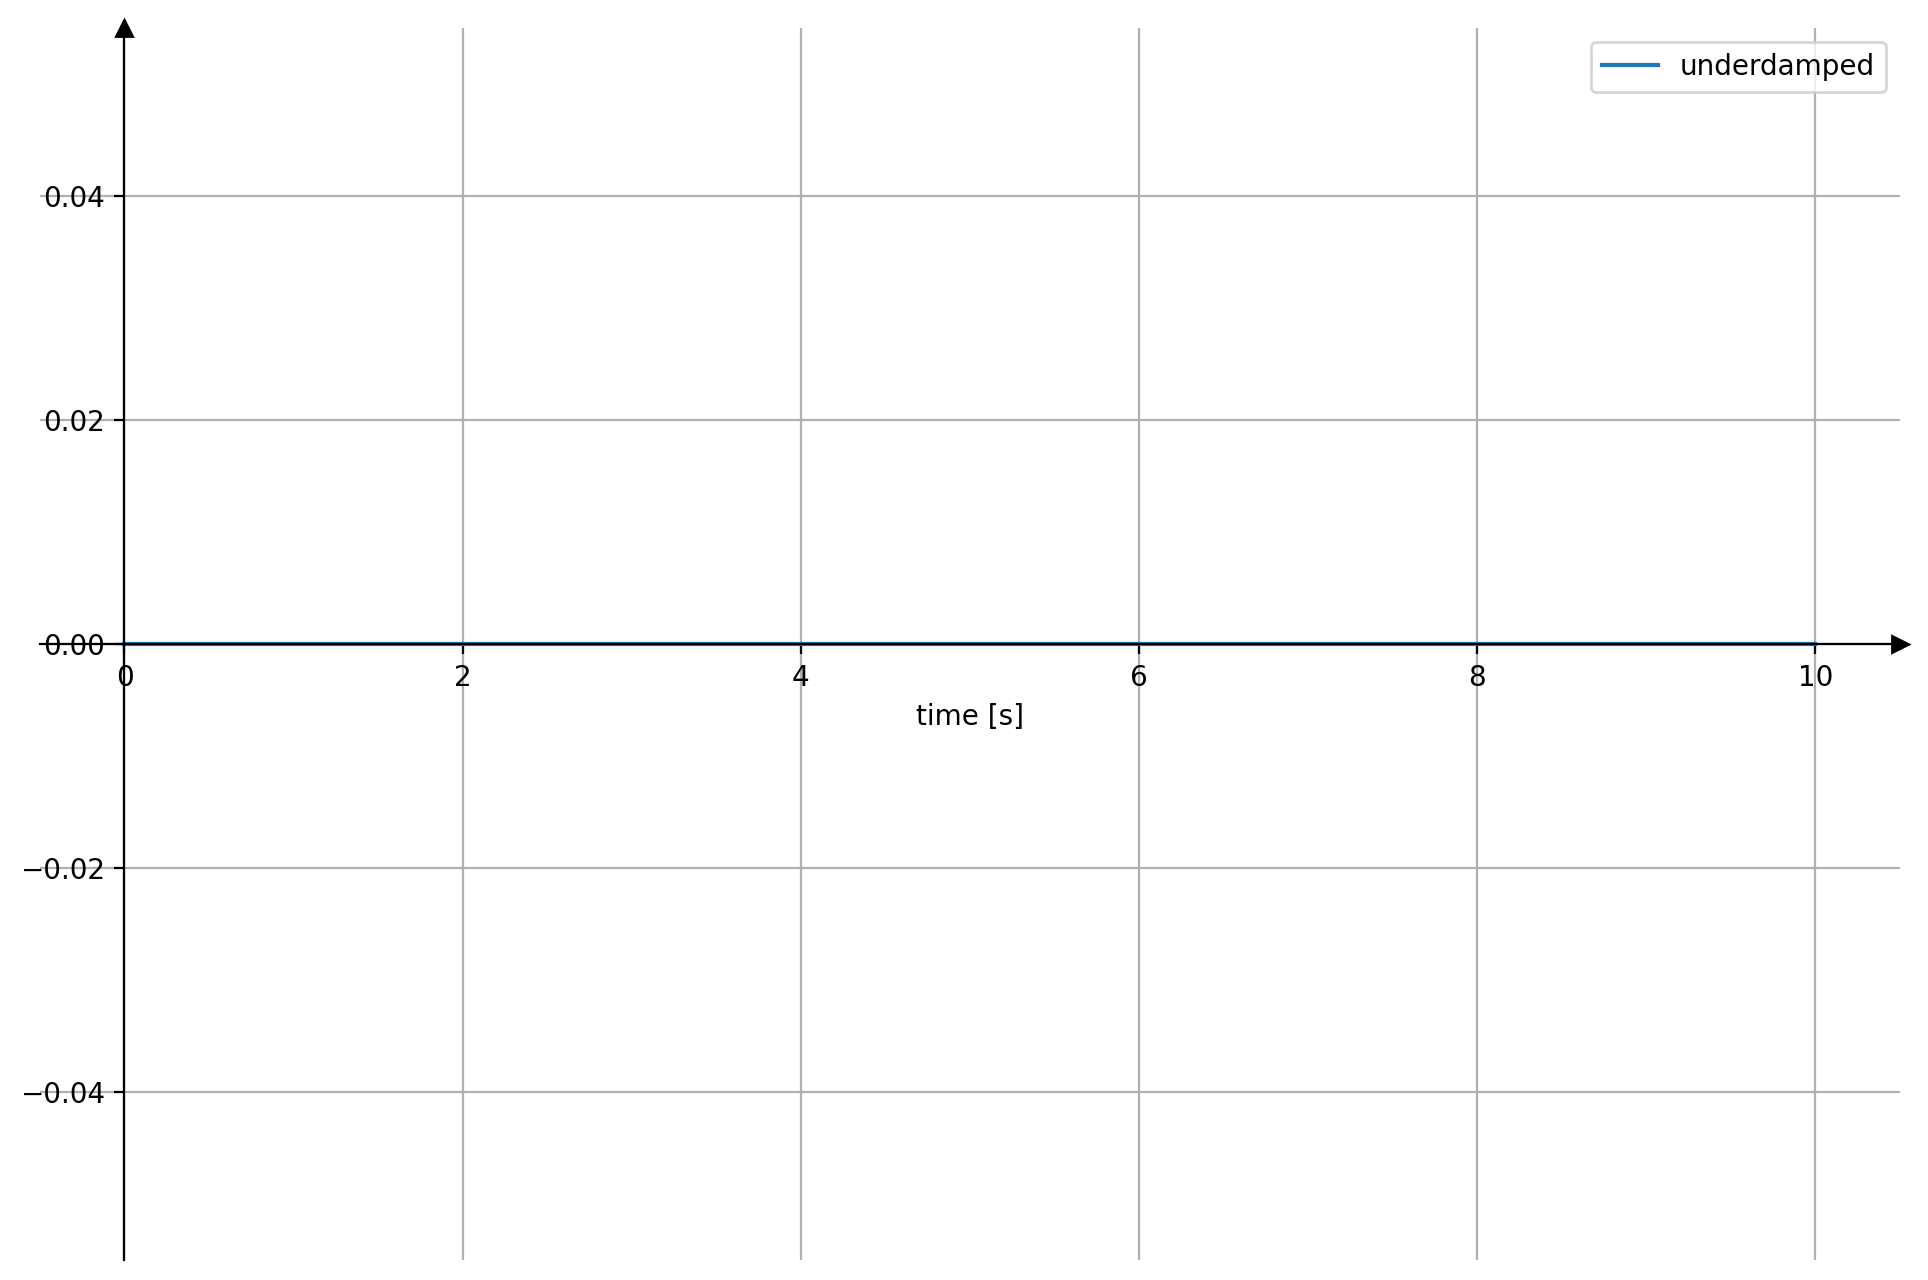

In [10]:
### garbage right now

# critical vs overdamped vs underdamped
# overdamped
omega0=1.2
gamma0 = 10*omega0
o1 = omega_eff(gamma0, omega0)
print("o1 is ", o1)

overdamped = damped_sho(o1, gamma0, xvals,  1./(2.*o1.real), -.1/(2.*o1.real))

# underdramped
gamma0 = .001*omega0
o3 = omega_eff(gamma0, omega0).imag
print("o3 is ", o3)
underdamped = damped_sho(o3, gamma0, xvals, 1/(2*o3), -1/(2*o3))


#plt.plot(xvals, np.real(overdamped), label="overdamped")
#plt.plot(xvals, np.real(critical), label="critical")
plt.plot(xvals, np.real(underdamped), label="underdamped")
plt.xlabel("time [s]")
plt.legend()
ugh()


[5.07187374749499, 0.14801438628490168] [5.32187374749499, 0.14801438628490168]


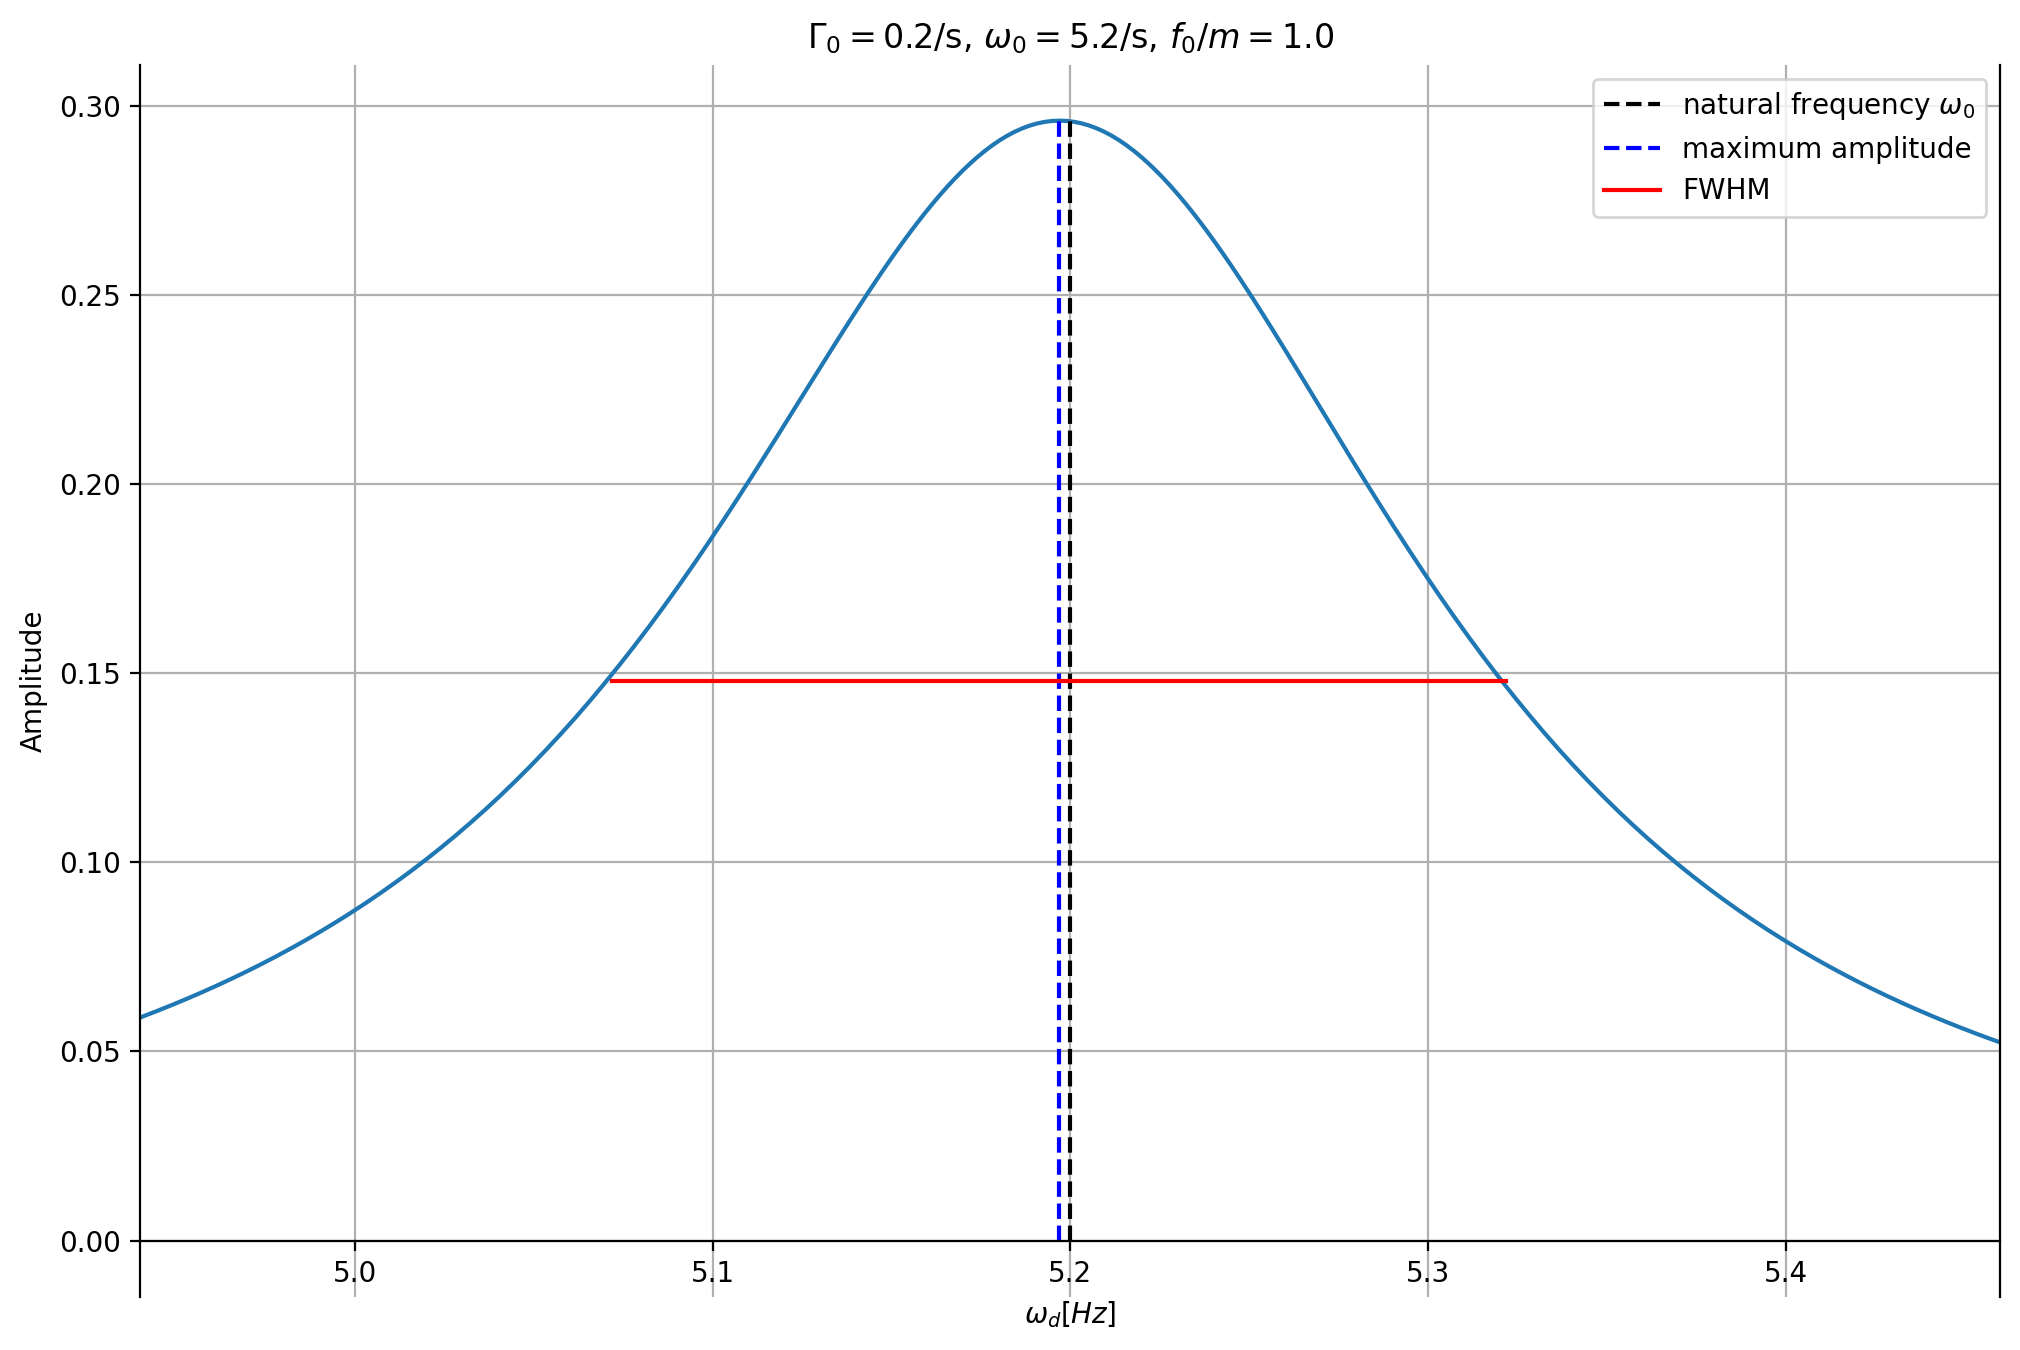

In [11]:
# amplitude scan for driven, damped oscillator
gamma0=.25
omega0=5.2
f0=1
m=1
omegadvals = np.linspace(0.9*omega0, 1.1*omega0, 500)
yvals = np.array( [(f0/m)*(1./((omega0**2-omegad**2)**2+gamma0**2*omegad**2))*0.5 for omegad in omegadvals])
plt.plot(omegadvals, yvals)
plt.xlabel("$\omega_d [Hz]$")
plt.ylabel("Amplitude")
plt.title("$\Gamma_0=%3.1f$/s, $\omega_0=%3.1f$/s, $f_0/m=%3.1f$" %(gamma0,omega0, f0/m))
ymax = np.max(yvals)
plt.xlim(0.95*omega0, 1.05*omega0)
# draw a line from y= to maximum of yvals at x position of omega0
plt.plot([omega0, omega0], [0, ymax], 'k--', label="natural frequency $\omega_0$")
# draw a line from y=0 to maximum of yvals at x position of maximum of yvals
xmax = omegadvals[np.argmax(yvals)]
plt.plot([xmax, xmax ], [0, ymax], 'b--', label = "maximum amplitude")

## draw FWHM of curve
print([xmax-gamma0/2, ymax/2.], [xmax+gamma0/2, ymax/2.])
plt.plot([xmax-gamma0/2, xmax+gamma0/2 ],[ymax/2, ymax/2], 'r-', label="FWHM")
plt.grid()
plt.legend()

### fix up the axes
ax = plt.gca()
# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()


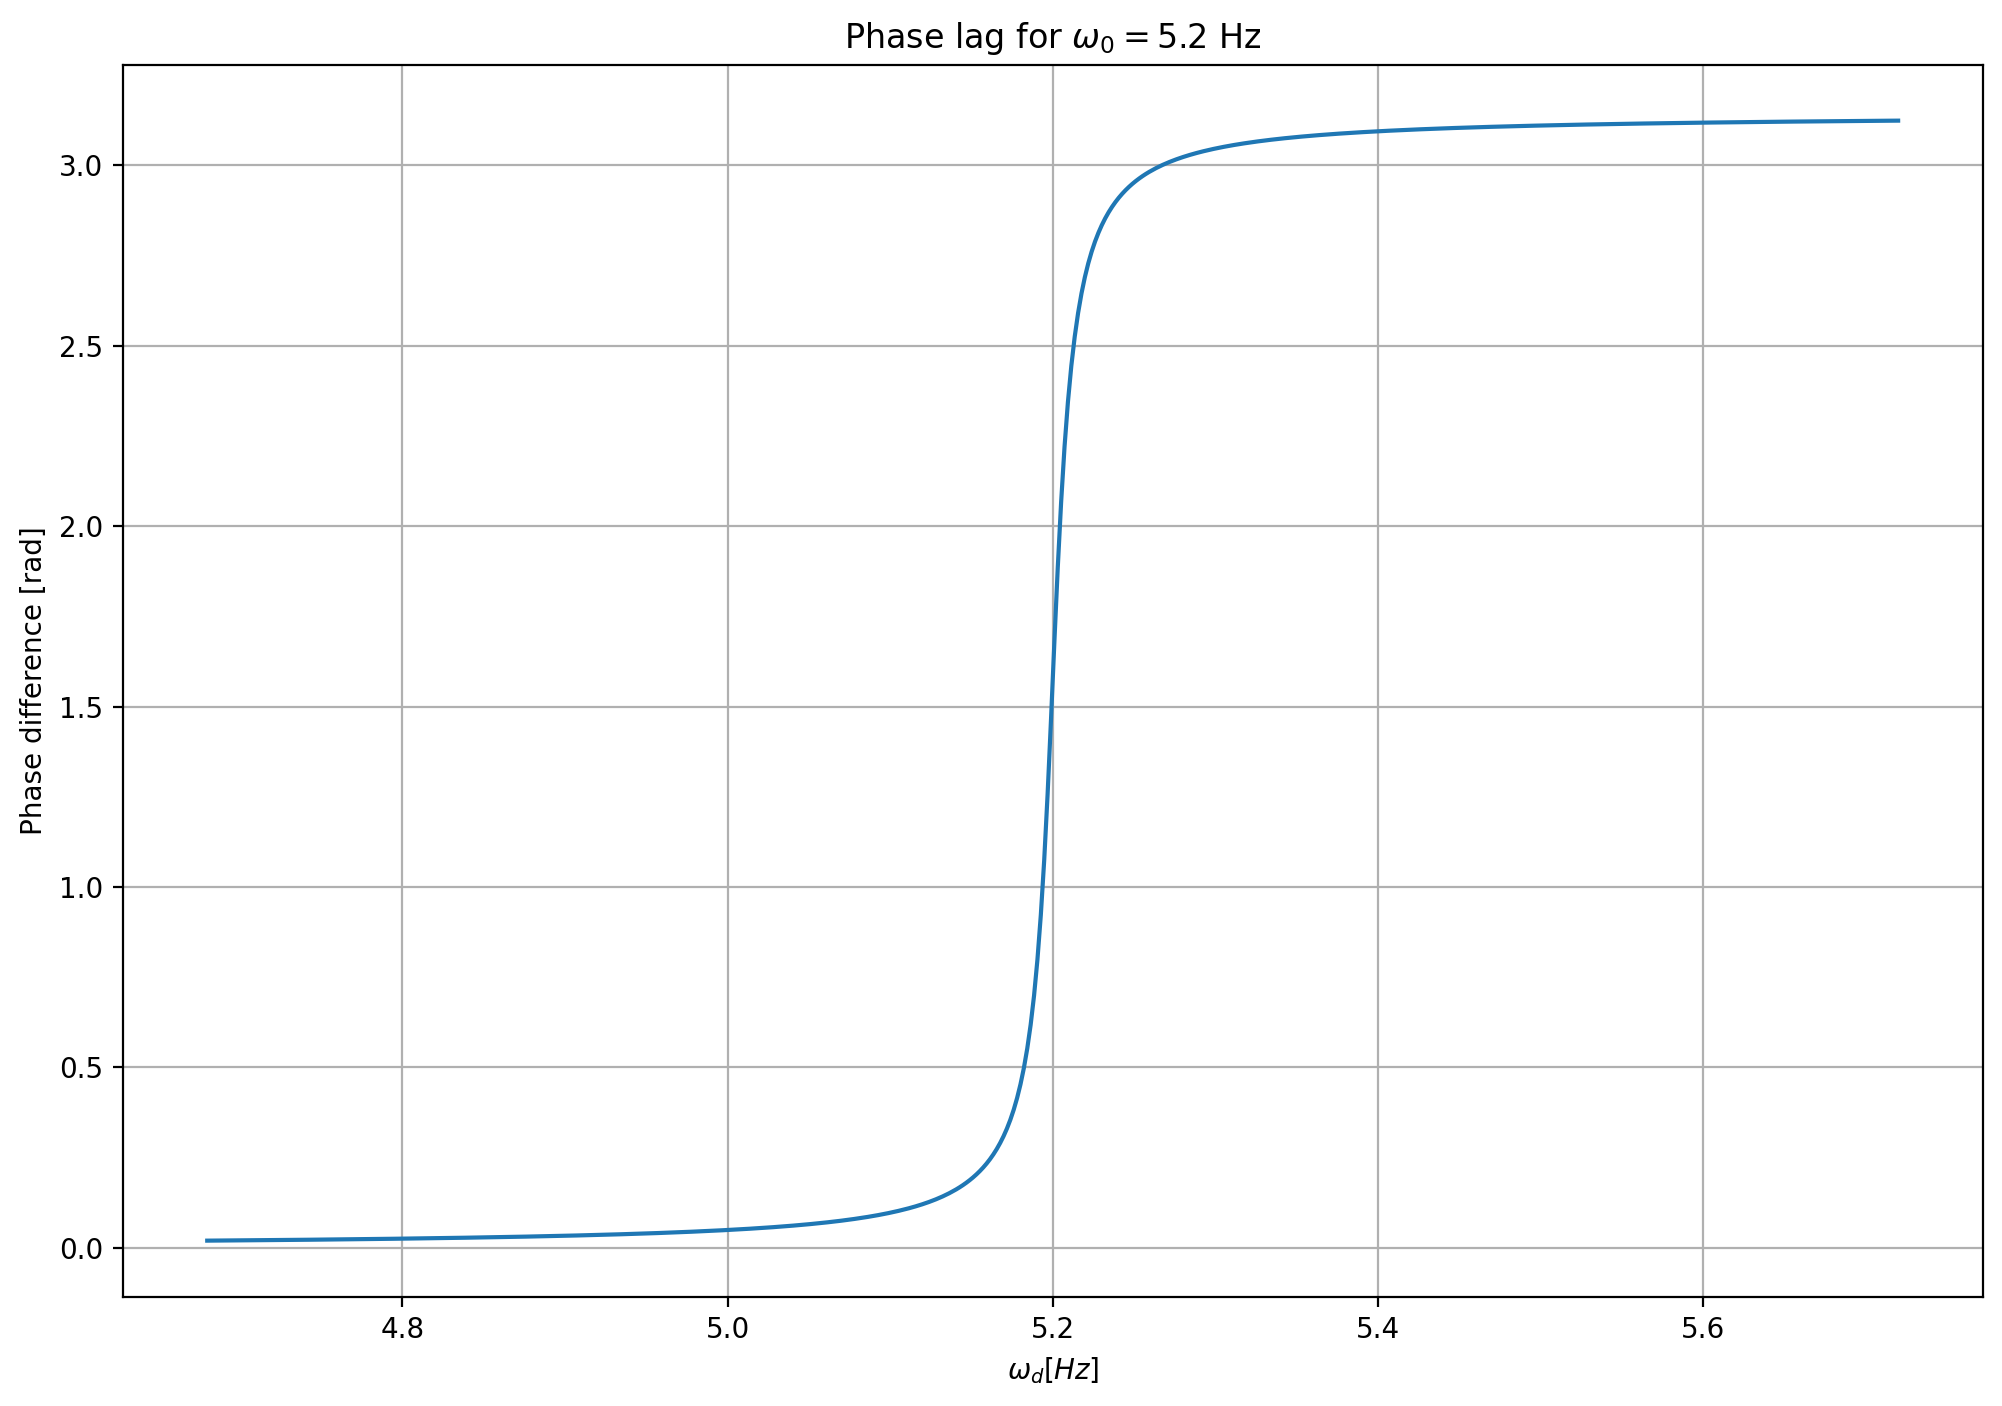

In [12]:
# phase difference
def phase(omegad: float) -> float:
    denominator = (omega0**2-omegad**2)
    return math.atan2(omega*gamma0,denominator)

phasevals = [ phase(omegad) for omegad in omegadvals]
plt.plot(omegadvals, phasevals)
plt.xlabel("$\omega_d [Hz]$")
plt.ylabel("Phase difference [rad]")
plt.title("Phase lag for $\omega_0=%3.1f$ Hz" % omega0) 

#ugh()
plt.grid(True)
